#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [2]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [3]:
# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **  
The number of rooms per dwelling, RM, feature provides some indication of the size of the house one is considering, and therefore a good baseline descriptor. As for the surrounding environment good features to consider would be pupil-teacher by town, PTRATIO, and proportion of non-retail business acres per town, INDUS. A low INDUS ratio would seem to indicate an area of less industrial in nature. Since it would to have less warehouses, major office buildings, or farmland.  As those would be non-retail businesses. A high teacher student ratio can indicate a good school system if the population is not sparse as in a rural area. 

##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [20]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **  
RM:  5.609   
PTRATIO:  20.2   
INDUS:  18.1

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [5]:
# Put any import statements you need for this code block here
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.3, 
                                                                         random_state = 0)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
The train/test split is the first step in constructing all the model diagnostics we perform in the methods learning_curves and model_complexity. Without the test set, we would not be able to gauge whether the model is tending to over-fit the data. A model can be made to fit a certain data set exactly, but this does not guarantee it will generalize well to yet unseen data. We can spot patterns that indicate over fitting in training vs test error plots for our model.

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [6]:
# Put any import statements you need for this code block here
import sklearn.metrics as m

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = m.mean_absolute_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **  
Accuracy, Precision, Recall, and F1 score are performance metrics used in classification problems. The first three are ratios of correct predictions over, number of samples, true and false positives, and true positives and false negatives, respectively. F1 score is the the ratio of the product to the sum of precision and recall. Since we are working a regression problem none of these measures are applicable. As for MSE and MAE they both performed similarly in the sense that after running GridSearchCV under both error metrics 200 times and averaging the best parameter found under each, both essential provided a max_depth parameter between 5-6. As can be seen by the commented code right below. MAE does not involve squaring, only a sign flip, so might be computationally less intensive, maybe? 
 

In [22]:
######ANSWER 4 CONTINUED######
# from sklearn.metrics import make_scorer
# from sklearn.grid_search import GridSearchCV

# X, y = housing_features, housing_prices

# regressor = DecisionTreeRegressor()

# parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

# metrics = {'median_ae' : m.median_absolute_error,  'mean_ae': m.mean_absolute_error,  
#                'mse': m.mean_squared_error}

# for key in metrics:
#     found_param = []
#     for i in range(200):
#         scorer = make_scorer(metrics[key], greater_is_better=False)
#         reg = GridSearchCV(regressor, parameters, scoring=scorer)
#         reg.fit(X,y)
#         found_param.append(reg.best_params_['max_depth'])
#     print key +"'s max_depth choice on average: ", np.mean(found_param), " with std: ", np.std(found_param)

median_ae's max_depth choice on average:  5.715  with std:  0.702691255104
mean_ae's max_depth choice on average:  5.135  with std:  1.12551099506
mse's max_depth choice on average:  5.695  with std:  1.9778713305


##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [17]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """
    
    metrics = {'median_ae' : m.median_absolute_error,  'mean_ae': m.mean_absolute_error,  
               'mse': m.mean_squared_error}
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()


    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(metrics['mean_ae'], greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor,parameters, scoring=scoring_function)
    
    # Fit the learner to the dataset to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg

    
# Test fit_model
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **  
Grid search provides a convenient method for tweaking the parameters of the model (in this
case, just max_depth, for tree regression) in a more automatic way by;  
i. Choosing an instance of each paramter type (in this case only max depth)   
ii. Then running fit with it  
iii. Then testing it on the test set   
It repeates this for every parameter value combination fed to it, It then picks the parameter that yielded the smallest error on average out of all trials. For cross-validation, GridSearchCV by default splits the data 3-ways, I believe randomizes its order, and then systematically trains each parameter (only a list of values for max_depth in our case) on 2/3 of the split and tests it on the remaining 1/3. Then repeats with different 2/3, 1/3 parts of the data. 


##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **
Cross validation is important because say we train different versions of a model, i.e. using different parameters, on a training set, then test them on the test set. If we then choose the model that had the smallest error, in a sense we fit it specifically to the test set. We have lost a way to measure how well the model will generalize to new data. By having an additional validation set, we can tweak the model by choosing parameters to minimize error on it, AND still have a separate test set with which to measure future performance. Grid search does a version of this by alternating between 2/3 and 1/3 splits in the data (as I understood it) and using ALL the data for training and testing.

#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [23]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [24]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/home/krolik/anaconda3/envs/udacity_machine/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/krolik/anaconda3/envs/udacity_machine/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


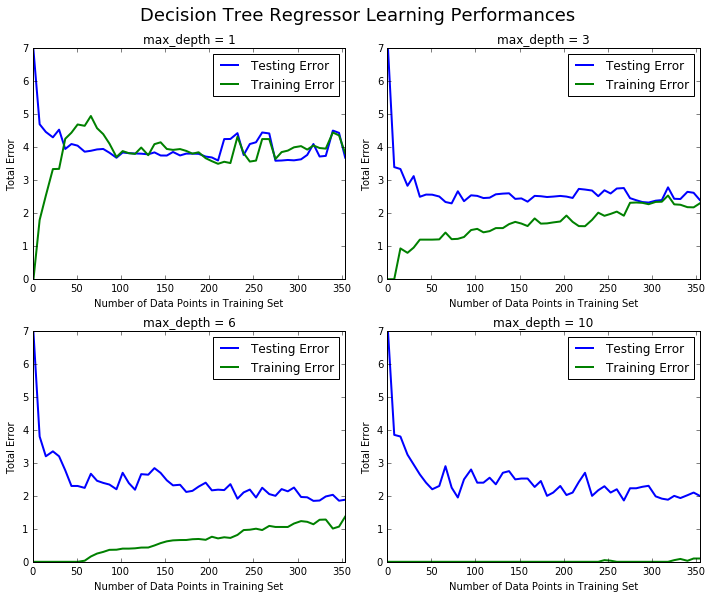

In [29]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **  
All these plots have a similar pattern in common. We can take plot two of max_depth = 3 to describe it. Here the training error curve starts at zero and test error curve starts at a max. This is explained because few data points can always be fit by a model, while the chances of that same model predicting an unseen example are low(heavily biased). As the amount of data is incremented the curves approach each other since it is harder to fit all examples perfectly (training set), but bias is being reduced (test set). They then both seem to converge more or less on the horizonal line y = 2.3 (taking y-axis as Total Error axis )

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **  
For the lowest value of max_depth, max_depth=1 and using the full training set the curves level off at a high error. More or less the horizontal line y = 4. This indicates that the model is biased overall. Neither the training set nor the test set are being fit particularly well. As max_depth increases the horizontal where the two curves are converging, moves towards the x-axis. This is happening because the more complex model is capable of fitting the training set better AND generalizing to the test set better. For the opposite case of max_depth = 10, the trainig error curve virtually converges to y= 0 while the test error is no better. This last situation is describing high variance, or over-fitting, since the training set fit almost perfectly while no better prediction is occurring with the test data.

Creating a model complexity graph. . . 


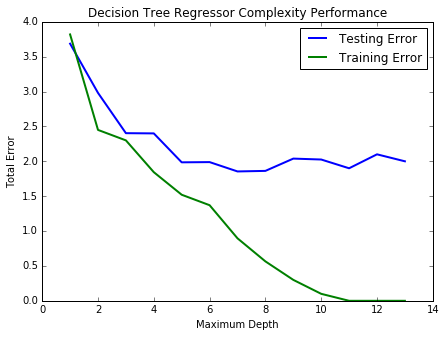

In [30]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: ** 
A max_depth between 5-6 is what we want, since it agrees with the behavior of the
Model_complexity_graph. Here, a clear divergence between the test and training error curves can be seen between max_depths of 5 and 6. At that point the training error curve continues its descent
towards zero (as it over-fits) while the test error curve levels off horizontally. So that after 5-6
max_depth the model would start to approach a perfect fit to the training data (training error), while not
predicting unseen data with any better accuracy (test error).

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [31]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 6}


**Answer: **  
Initial intuition pointed to a max_depth between 5 and 6. Grid_search found max_depth = 6, which agrees with it.  

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [28]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: **  
For the given data point;  
x = [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]  
the model predicted 20.766. This number is well within one standard deviation of the mean for
all data calculated in part 1. Under that criteria at least, the prediction seems reasonable.

##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **  
Well first off, the model is based on data compiled in 1978. Who knows which of those houses still exist, how bad good neighborhoods have soured, and how most any of those metrics have changed by 2016. So in short no. But if we were to suppose the data was compiled recently, honestly I would still like to see how the model's price predictions compare to the prices assigned to homes by other human real estate angents. Just to have some sort of real world concrete comparison. So maybe I would test the model by inputing the features of houses that had been recently been put on the market by other owners and their real estate agents. So in that case I would still like to see it working along side human set prices to see how reasonble it really is.  